In [4]:
import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sb
import os
import matplotlib.pyplot as plt

# Problem statement
  Casava has few types of diseases. The goal is to identify the __type__ of disease based on casava leaf image. 

  
    

## Data  
- __label_num_to_disease_mapping__: Contains the label name for the disease.
- __train.csv__ : This contains image file name and correspoinding label id.
- __train_images__ : folder contains train images
- __test_images__ : folder contains test images

In [9]:
# Set up directory paths
base_path='data'
train_ds_path='data/train'
test_ds_path='data/test'
train_label = os.path.join(base_path, 'train.csv')

In [10]:
# Show details of label - Types of diseases
pd.read_json(path_or_buf= 'data/label_num_to_disease_map.json'
             , orient='columns',typ='series')

ValueError: Expected object or value

In [11]:
# Load the train_ds csv file
train_ds = pd.read_csv(filepath_or_buffer=os.path.join(base_path,'train.csv'))
train_ds.head()

,image_id,label
0,1000015157.jpg,0
1,1000201771.jpg,3
2,100042118.jpg,1
3,1000723321.jpg,1
4,1000812911.jpg,3


In [13]:
# Check unique labels and ensure that they map to json files - 0-4
print(train_ds.nunique(axis=0))

image_id    21397
label           5
dtype: int64


The above confirms that there are 21398 (starts with 0) images with 5 labels.
Let's see how what are most prevelant disease types

In [14]:
count_by_label=train_ds.groupby("label")['label'].count()
print('Count By Label \n',count_by_label)

Count By Label 
 label
0     1087
1     2189
2     2386
3    13158
4     2577
Name: label, dtype: int64


In [15]:
np.sort(pd.unique(train_ds["label"]))

array([0, 1, 2, 3, 4])

In [16]:
labels = {"Id": np.sort(pd.unique(train_ds["label"])),
          "count": np.array(count_by_label)}

percenatge_by_label = pd.DataFrame(data=labels)
percenatge_by_label['%age']=\
    percenatge_by_label['count']*100/percenatge_by_label['count'].sum()
percenatge_by_label=percenatge_by_label.drop(columns=['count'])
#percenatge_by_label.drop(labels=['count'])
percenatge_by_label

,Id,%age
0,0,5.080151
1,1,10.230406
2,2,11.151096
3,3,61.494602
4,4,12.043744


This shows that labels are not equally distributed and that disease type - __Cassava Mosaic Disease (CMD)__ seems to be more common in traning set. 

Let's check as bar graph- count, pie as % distribution and bar as % distribution

In [17]:
print()

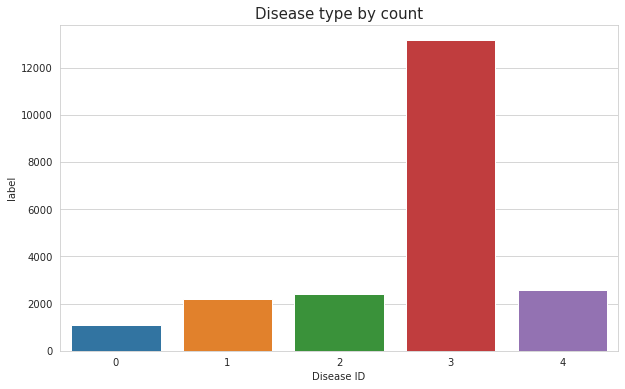

In [18]:
sb.set_style("whitegrid")
fig,ax = plt.subplots(figsize=(10,6))
ax.set_title("Disease type by count", fontsize=15)
ax.set_xlabel("Disease ID")
ax.set_ylabel("Count")

sb.barplot(x=np.sort(pd.unique(train_ds["label"])),
           y=count_by_label, dodge=False )

plt.show()

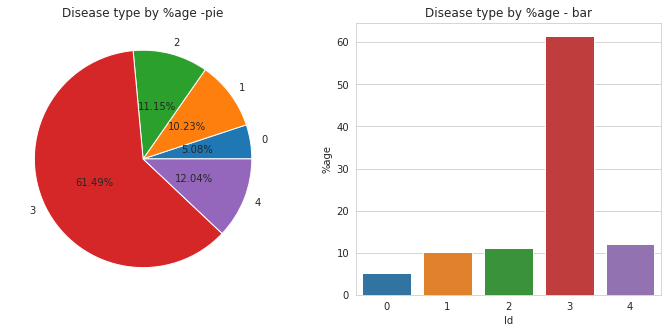

In [213]:
percenatge_by_label=percenatge_by_label.astype({"Id":str})
percenatge_by_label.dtypes
fig,(ax1, ax2)  = plt.subplots(nrows=1, ncols=2, figsize=(12,5))

ax1.set_title('Disease type by %age -pie')
ax1.pie(x=percenatge_by_label['%age'],
         data=percenatge_by_label,
        autopct="%.2f%%", 
        #explode=[0.05]*4, 
        labels=percenatge_by_label['Id'],
        pctdistance=0.5)
plt.subplot(1,2,2)
plt.title('Disease type by %age - bar')
sb.barplot(x=percenatge_by_label['Id'], 
y=percenatge_by_label['%age'])

plt.show()